In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Awesome Oscillator Indicator

In [2]:
import pandas as pd
import mplfinance as mpf
#import matplotlib.dates as mdates

In [3]:
# Read in daily data for NSE TCS
infile = 'data/nse:tcs.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True)

### Awesome Oscillator Calculation:

In [4]:
AO_LONG_PERIOD  = 34
AO_SHORT_PERIOD = 5
# Calculation For Simple Moving Average For Length 34 as Long SMA
df['SMA34'] = df['Close'].rolling(AO_LONG_PERIOD).mean()

# Calculation For Simple Moving Average For Length 5 as Short SMA
df['SMA5'] = df['Close'].rolling(AO_SHORT_PERIOD).mean()

# Awesome_Oscillator Column Assign To df
df['AO'] = df['SMA5'] - df['SMA34']

In [5]:
# Function For Generate Color Awesome_oscillator
def generate_awesome_oscillator_color(df):
    awesome_oscillator_color = []
    awesome_oscillator_color.clear()
    for i in range (0,len(df["AO"])):
        if df["AO"][i] >= 0 and df["AO"][i-1] < df["AO"][i]:
            awesome_oscillator_color.append('#26A69A')
            #print(i,'green')
        elif df["AO"][i] >= 0 and df["AO"][i-1] > df["AO"][i]:
            awesome_oscillator_color.append('#FF5252')
            #print(i,'faint green')
        elif df["AO"][i] < 0 and df["AO"][i-1] > df["AO"][i] :
            #print(i,'red')
            awesome_oscillator_color.append('#FF5252')
        elif df["AO"][i] < 0 and df["AO"][i-1] < df["AO"][i] :
            #print(i,'faint red')
            awesome_oscillator_color.append('#26A69A')
        else:
            awesome_oscillator_color.append('#000000')
    return awesome_oscillator_color

In [6]:
# skip to where the awesome oscillator starts:
df = df.iloc[AO_LONG_PERIOD:,:]

In [7]:
# List of Color Assiging To Awesome Oscillator
awesome_oscillator_color = generate_awesome_oscillator_color(df)

In [8]:
ao = mpf.make_addplot(df['AO'],
                      type='bar',
                      width=0.7,
                      color=awesome_oscillator_color,
                      panel=1,
                      secondary_y=True)

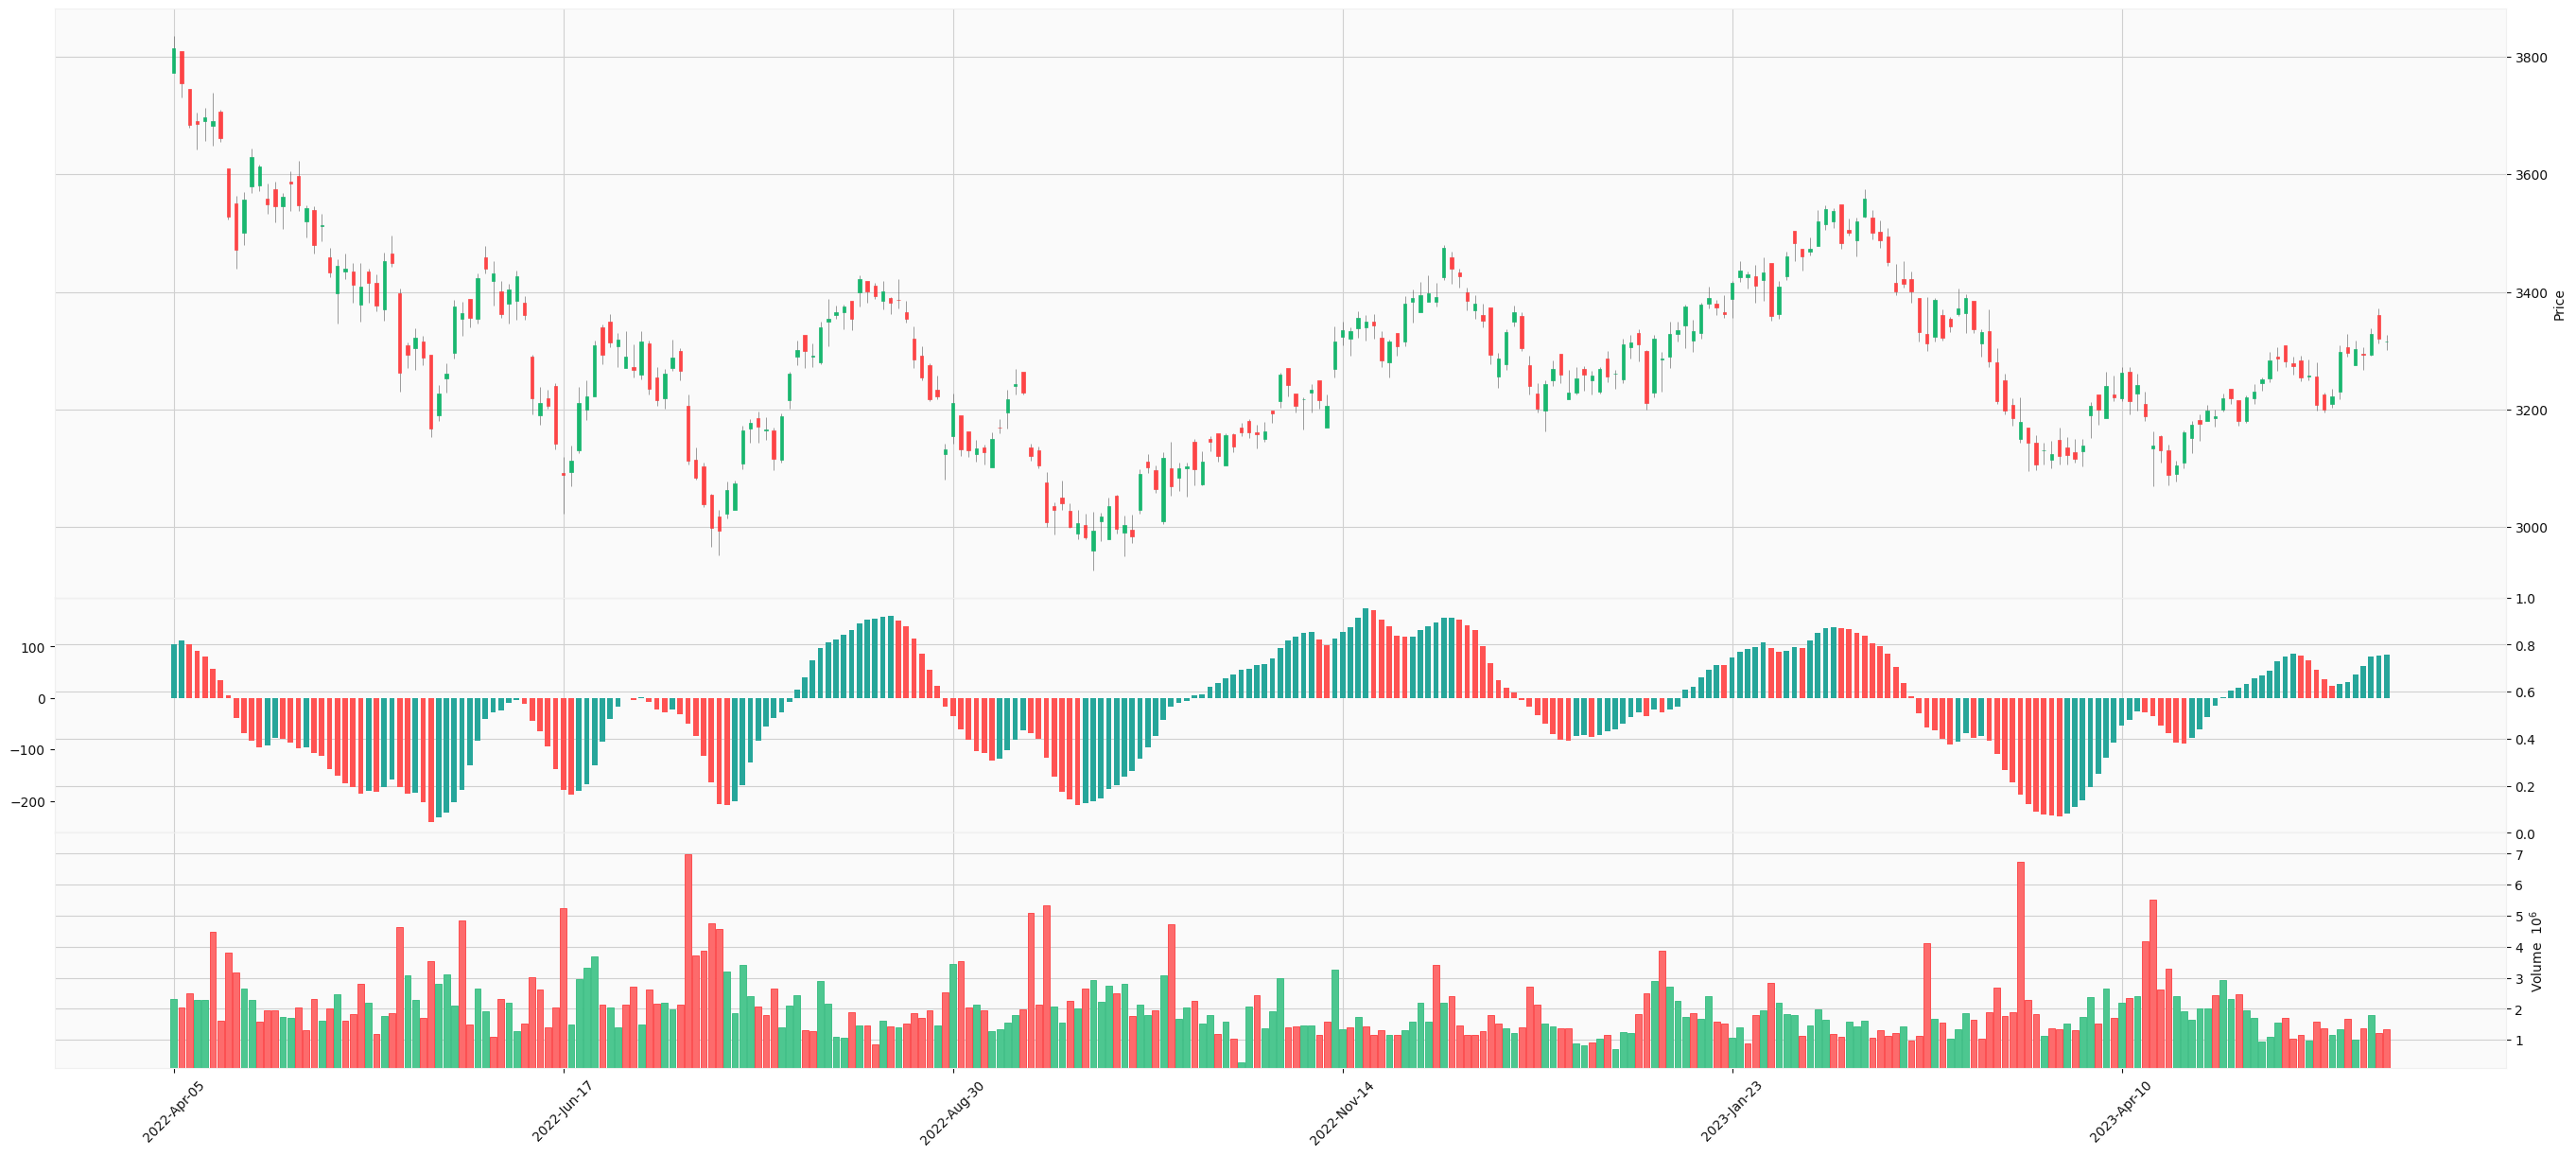

In [9]:
mpf.plot(df,
         volume=True,
         volume_panel = 2,
         type="candle",
         style="yahoo",
         addplot=ao,
         figsize=(36,16)
        )